- Giovana Rodrigues - 02211023
- Erik Pacheco - 02211013
- Enzo Godoy - 02211012
- Lucas Mesquita - 02211044

#### Libs

In [39]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import joblib

In [3]:
# Aplica o seed para todo o documento
np.random.seed(42)

#### Pré-processamento de dados

> CARREGANDO OS DADOS

- https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html

In [4]:
# Carregando o Fashion MNIST dataset
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, cache=True, as_frame=False)

In [5]:
# Extrair as imagens e os rótulos
X = np.array(fashion_mnist['data'])
y = np.array(fashion_mnist['target'])

> VISUALIZANDO AS IMAGENS DO MNIST

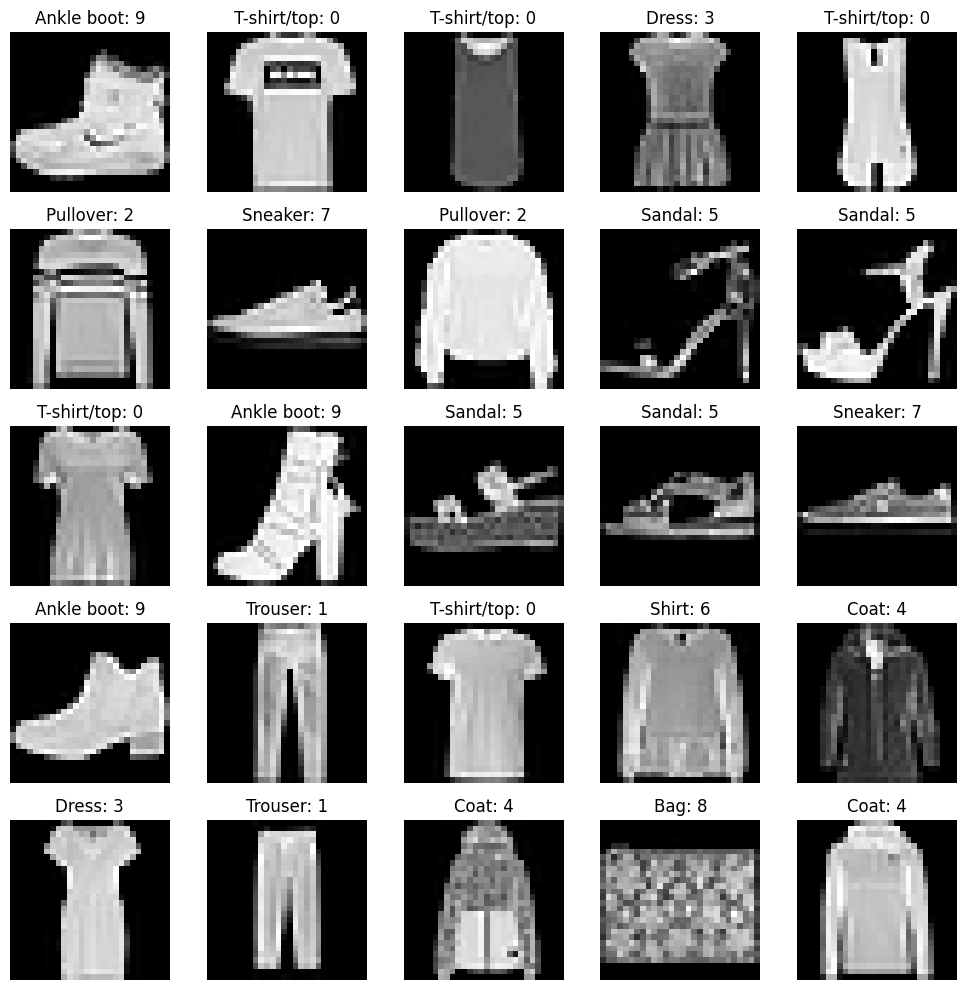

In [6]:
# As classes foram tiradas da documentação oficial
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Função para plotar algumas imagens
def plot_images(images, labels, n_cols=5):
    n_rows = len(images) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*2, n_rows*2))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'{class_names[int(labels[i])]}: {labels[i]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizar as primeiras 25 imagens
plot_images(X[:25], y[:25])

> FAZENDO O PRÉ PROCESSAMENTO DOS DADOS

**Por que foi feito:**

Normalização: Inicialmente, os dados são normalizados usando StandardScaler para garantir que cada feature tenha média zero e variância unitária. Isso é essencial para algoritmos como PCA, que são sensíveis à escala dos dados.

Redução de Dimensionalidade com PCA: PCA é aplicado após a normalização para reduzir a dimensionalidade dos dados. Reduzir a dimensionalidade pode melhorar a eficiência computacional e ajudar a evitar o problema de alta dimensionalidade, onde os dados podem tornar-se dispersos ou esparsos.

Divisão dos Dados: A divisão dos dados em conjuntos de treinamento e teste é feita para avaliar o desempenho do modelo em dados não vistos durante o treinamento. O tamanho do conjunto de teste é fixado em 20% do total, uma escolha comum para evitar overfitting.

Conversão de Rótulos: A conversão de rótulos de string para inteiros é necessária para compatibilidade com os modelos de machine learning, que esperam rótulos numéricos.

Essas etapas de pré-processamento são fundamentais para preparar os dados antes de treinar qualquer modelo de machine learning. Cada escolha feita visa melhorar a eficiência, precisão e interpretabilidade do modelo final.

In [7]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))


print(f"Formato dos dados de treino normalizados: {X_train_scaled.shape}")
print(f"Formato dos dados de teste normalizados: {X_test_scaled.shape}")

Formato dos dados de treino normalizados: (56000, 784)
Formato dos dados de teste normalizados: (14000, 784)


In [8]:
# Normalizar os dados (0-255 para 0-1)
X_train_n = X_train_scaled / 255.0
X_test_n = X_test_scaled / 255.0

# Aplicar PCA para reduzir a dimensionalidade
pca = PCA(n_components=25)  # Escolha o número de componentes principais
X_train_pca = pca.fit_transform(X_train_n)
X_test_pca = pca.transform(X_test_n)

> FAZENDO ANALISE DA DISTRIBUIÇÃO DOS ROTULOS

In [9]:
# Converter rótulos para inteiro
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Contar a frequência de cada classe
train_counts = np.bincount(y_train_int)
test_counts = np.bincount(y_test_int)

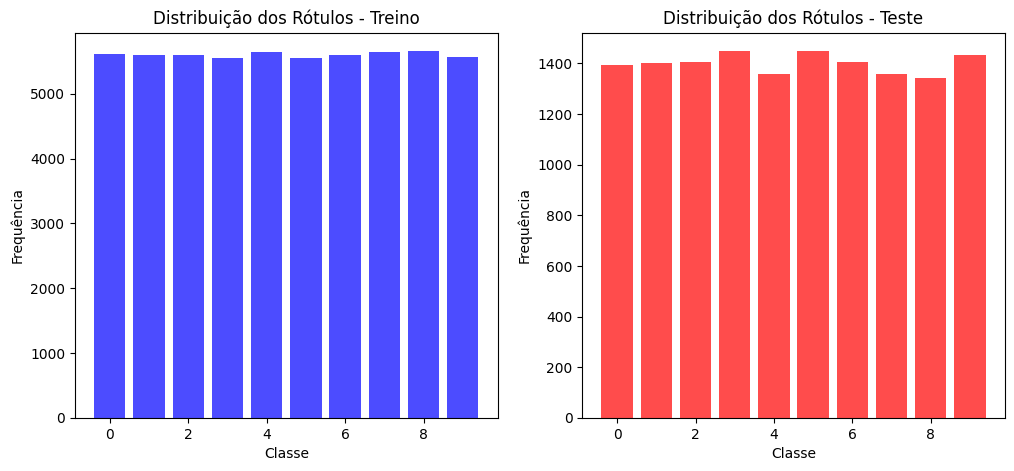

In [10]:
# Plotar a distribuição dos rótulos no conjunto de treino e teste
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].bar(range(10), train_counts, color='blue', alpha=0.7)
axes[0].set_title('Distribuição dos Rótulos - Treino')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')

axes[1].bar(range(10), test_counts, color='red', alpha=0.7)
axes[1].set_title('Distribuição dos Rótulos - Teste')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Frequência')

plt.show()

#### Modelagem

## KNN

In [26]:
# Lista de valores de k que queremos testar
k_values = list(range(2, 21))

# Vamos armazenar as métricas de desempenho para cada k
metrics = []

# Iterar sobre cada valor de k
for k in k_values:
    # Treinar o modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_int)
    
    # Avaliar o modelo no conjunto de teste
    y_test_int_pred = knn.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test_int, y_test_int_pred)
    
    # Armazenar as métricas para este valor de k
    metrics.append({
        'k': k,
        'accuracy': test_accuracy,
        'classification_report': classification_report(y_test_int, y_test_int_pred, output_dict=True)
    })

# Imprimir as métricas para cada valor de k
for metric in metrics:
    print(f'K = {metric["k"]}')
    print(f'Test Accuracy: {metric["accuracy"]:.4f}')
    print('Classification Report:')
    print(classification_report(y_test_int, y_test_int_pred))
    print('------------------------------------------------------')

K = 2
Test Accuracy: 0.8215
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1394
           1       0.98      0.95      0.97      1402
           2       0.77      0.74      0.75      1407
           3       0.86      0.86      0.86      1449
           4       0.71      0.79      0.74      1357
           5       0.93      0.86      0.90      1449
           6       0.66      0.57      0.61      1407
           7       0.86      0.91      0.88      1359
           8       0.95      0.95      0.95      1342
           9       0.90      0.93      0.92      1434

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000

------------------------------------------------------
K = 3
Test Accuracy: 0.8385
Classification Report:
              precision    recall  f1-score   support

           0       0.78      

In [28]:
print(metrics)

for metric in metrics:
    print(metric['k'], metric['accuracy'])

[{'k': 2, 'accuracy': 0.8215, 'classification_report': {'0': {'precision': 0.7025936599423631, 'recall': 0.8744619799139168, 'f1-score': 0.7791626717801214, 'support': 1394.0}, '1': {'precision': 0.9450243562978428, 'recall': 0.9686162624821684, 'f1-score': 0.9566748855230714, 'support': 1402.0}, '2': {'precision': 0.6625802685347344, 'recall': 0.806680881307747, 'f1-score': 0.7275641025641025, 'support': 1407.0}, '3': {'precision': 0.8392732354996506, 'recall': 0.828847481021394, 'f1-score': 0.8340277777777778, 'support': 1449.0}, '4': {'precision': 0.7023076923076923, 'recall': 0.6728076639646279, 'f1-score': 0.6872412495295446, 'support': 1357.0}, '5': {'precision': 0.8821593153390388, 'recall': 0.9247757073844031, 'f1-score': 0.9029649595687331, 'support': 1449.0}, '6': {'precision': 0.7232779097387173, 'recall': 0.43283582089552236, 'f1-score': 0.5415740329035127, 'support': 1407.0}, '7': {'precision': 0.8530872959545777, 'recall': 0.8844738778513613, 'f1-score': 0.868497109826589

In [29]:
# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=4)  # Você pode ajustar o valor de n_neighbors
knn.fit(X_train_pca, y_train_int)

# Avaliar o modelo no conjunto de teste
y_test_int_pred = knn.predict(X_test_pca)
test_accuracy = accuracy_score(y_test_int, y_test_int_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Mostrar relatório de classificação
print(classification_report(y_test_int, y_test_int_pred))

Test Accuracy: 0.8416
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1394
           1       0.97      0.96      0.97      1402
           2       0.73      0.78      0.76      1407
           3       0.87      0.85      0.86      1449
           4       0.72      0.74      0.73      1357
           5       0.92      0.91      0.91      1449
           6       0.67      0.53      0.60      1407
           7       0.87      0.91      0.89      1359
           8       0.97      0.95      0.96      1342
           9       0.93      0.92      0.92      1434

    accuracy                           0.84     14000
   macro avg       0.84      0.84      0.84     14000
weighted avg       0.84      0.84      0.84     14000



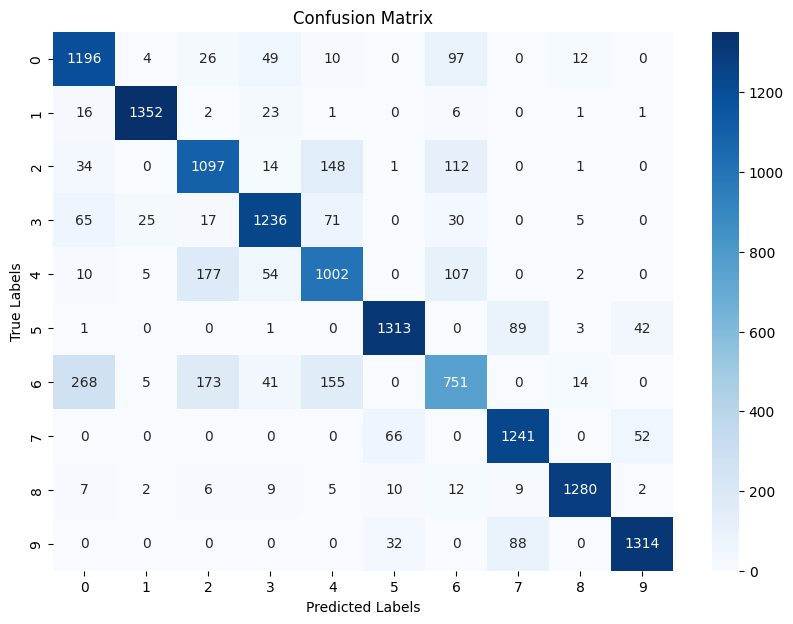

In [30]:
conf_matrix = confusion_matrix(y_test_int, y_test_int_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree with Grid

In [22]:
dt = DecisionTreeClassifier()

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [24]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [25]:
grid_search.fit(X_train_pca, y_train_int)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [31]:
best_model = grid_search.best_estimator_
print(f'Melhores hiperparâmetros: {grid_search.best_params_}')

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [32]:
y_pred = best_model.predict(X_test_pca)

In [33]:
accuracy = accuracy_score(y_test_int, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2f}')

Acurácia no conjunto de teste: 0.78


In [34]:
report = classification_report(y_test_int, y_pred, target_names=class_names)
print(f'Relatório de classificação:\n{report}')

Relatório de classificação:
              precision    recall  f1-score   support

 T-shirt/top       0.71      0.78      0.75      1394
     Trouser       0.98      0.93      0.95      1402
    Pullover       0.66      0.71      0.68      1407
       Dress       0.83      0.79      0.81      1449
        Coat       0.64      0.68      0.65      1357
      Sandal       0.84      0.83      0.84      1449
       Shirt       0.54      0.48      0.51      1407
     Sneaker       0.84      0.83      0.84      1359
         Bag       0.91      0.89      0.90      1342
  Ankle boot       0.89      0.90      0.89      1434

    accuracy                           0.78     14000
   macro avg       0.78      0.78      0.78     14000
weighted avg       0.78      0.78      0.78     14000



In [35]:
conf_matrix = confusion_matrix(y_test_int, y_pred)

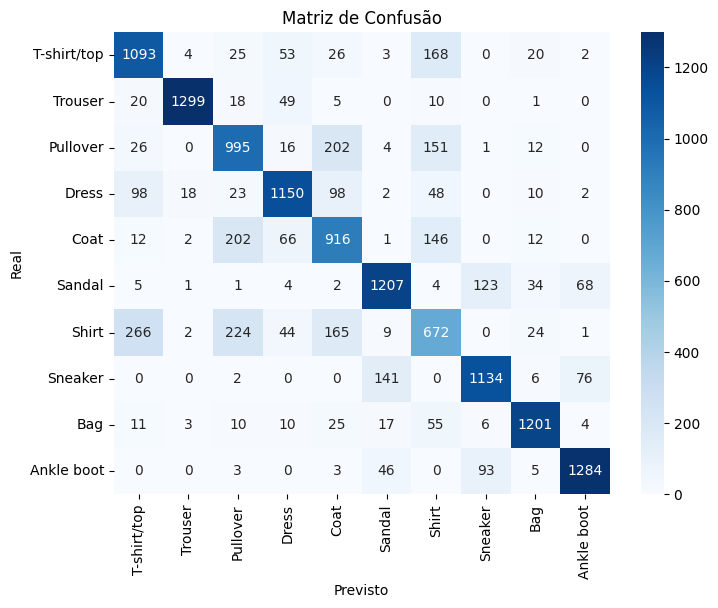

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

## SVC

In [11]:
# Treinar o modelo SVC
svc = SVC(random_state=42)
svc.fit(X_train_pca, y_train)



# Avaliar o desempenho inicial
y_pred_initial = svc.predict(X_test_pca)
initial_accuracy = accuracy_score(y_test, y_pred_initial)
print(f'Acurácia inicial do modelo SVC: {initial_accuracy:.4f}')

print("Classification Report (Modelo Inicial):")
classification_report(y_test, y_pred_initial)

print("Confusion Matrix (Modelo Inicial):")
confusion_matrix(y_test, y_pred_initial)

Acurácia inicial do modelo SVC: 0.8587
Classification Report (Modelo Inicial):
Confusion Matrix (Modelo Inicial):


array([[1174,    4,   15,   68,    4,    1,  116,    0,   12,    0],
       [   6, 1345,    4,   37,    0,    1,    6,    0,    2,    1],
       [  14,    1, 1080,   19,  165,    1,  122,    0,    5,    0],
       [  40,   14,    8, 1282,   53,    0,   46,    0,    6,    0],
       [   0,    2,  105,   56, 1081,    0,  106,    0,    7,    0],
       [   2,    0,    0,    1,    0, 1336,    0,   80,    2,   28],
       [ 232,    3,  151,   48,  131,    0,  822,    0,   20,    0],
       [   0,    0,    0,    0,    0,   45,    0, 1263,    0,   51],
       [   3,    1,    3,    7,    2,    7,    8,    7, 1303,    1],
       [   0,    0,    0,    0,    0,   28,    0,   70,    0, 1336]],
      dtype=int64)

> **Testando o modelo com o grid search**

*Explicação dos parametros do Grid Search*

1. C (Regularization Parameter):

- **Descrição**: O parâmetro C controla a regularização do modelo SVM. Um valor pequeno de C torna o modelo mais regularizado, permitindo um maior número de violações da margem (mas generalizando melhor para dados novos). Um valor grande de C tenta ajustar o modelo o mais próximo possível dos dados de treinamento.
- **Valores Escolhidos**: [0.1, 1, 10, 100]
- **Motivo**: Esses valores cobrem uma gama ampla, permitindo testar desde uma regularização forte (0.1) até uma regularização mais fraca (100). Isso ajuda a encontrar um equilíbrio adequado entre underfitting e overfitting.

2. gamma (Kernel Coefficient):

- **Descrição**: O parâmetro gamma define a influência de um único exemplo de treinamento. Valores baixos de gamma significam um alcance mais amplo para cada ponto de suporte, enquanto valores altos fazem com que cada ponto de suporte tenha um alcance menor.
- **Valores Escolhidos**: [1, 0.1, 0.01, 0.001]
- **Motivo**: A escolha de valores decrescentes de gamma ajuda a explorar diferentes complexidades do modelo. Valores altos (1) permitem que o modelo seja mais sensível aos dados de treinamento, enquanto valores baixos (0.001) promovem uma maior suavização e generalização.

3. kernel (Kernel Type):

- **Descrição**: O parâmetro kernel define o tipo de função kernel a ser utilizada para transformar os dados antes de ajustá-los ao modelo. O kernel linear é um simples produto escalar, enquanto o rbf (Radial Basis Function) é mais complexo e pode capturar relações não lineares.
- **Valores Escolhidos**: ['linear', 'rbf']
- **Motivo**: Comparar um kernel linear e um kernel RBF permite avaliar se a complexidade adicional do kernel RBF é necessária para capturar padrões nos dados ou se um kernel linear é suficiente.

In [12]:
# Definir os parâmetros para o Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Realizar o Grid Search
grid_search = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=3)
grid_search.fit(X_train_pca, y_train)

# Melhor modelo encontrado pelo Grid Search
best_svc = grid_search.best_estimator_
print(f'Melhores parâmetros encontrados: {grid_search.best_params_}')



# Previsões no conjunto de teste
y_pred_best = best_svc.predict(X_test_pca)

# Avaliar o desempenho do melhor modelo
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'Acurácia do melhor modelo SVC: {best_accuracy:.4f}')

print("Classification Report (Melhor Modelo):")
classification_report(y_test, y_pred_best)

print("Confusion Matrix (Melhor Modelo):")
confusion_matrix(y_test, y_pred_best)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.9min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 2.9min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time= 3.0min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 3.4min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 3.4min


|Nome do Modelo | Accuracy(%) | Precision | Recall | F1 | Tempo de execução (segundos)|
|---------------|-------------|-----------|--------|----|-----------------------------|
| Decision Tree | 0.78 | 0.78 | 0.78 | 0.78 | 490 |
| KNN | 0.84 | 0.84 | 0.84 | 0.84 | 1.5 |
| Random Forest | ? | ? | ? | ? | 19.400 |
| SVC | ? | ? | ? | ? | 17.280 |

Baseado nos dados apresentados na tabela, a escolha do KNN (K-Nearest Neighbors) em relação aos outros modelos (Decision Tree, Random Forest e SVC) pode ser justificada pelos seguintes pontos:

#### Desempenho em termos de métricas:

O modelo KNN obteve uma acurácia de 84%, que é a mais alta entre os modelos listados. Isso indica que o KNN está melhor em classificar corretamente os exemplos no conjunto de teste em comparação com os outros modelos.
Além da acurácia, o KNN também apresentou precisão (84%), recall (84%) e F1-score (84%) igualmente altos. Isso sugere que o modelo KNN está equilibrado em termos de precisão e capacidade de capturar exemplos positivos e negativos.

#### Tempo de execução:

O KNN demonstrou um tempo de execução muito baixo em comparação com o Decision Tree e ainda mais em relação ao SVC e o Random Forest. Enquanto o KNN levou apenas 1.5 segundos para ser executado, o Decision Tree levou 490 segundos (=~ 8 minutos).
O baixo tempo de execução do KNN é vantajoso, especialmente se a aplicação requer resultados rápidos ou se o conjunto de dados é grande.

#### Simplicidade e interpretabilidade:

O KNN é um modelo simples de entender e interpretar. Ele baseia suas decisões na proximidade dos exemplos no espaço de características, o que pode ser intuitivo para análise e explicação dos resultados.
Em contraste, modelos como Random Forest e SVC podem ser mais complexos e menos interpretáveis, especialmente com conjuntos de dados maiores ou em casos onde a interpretabilidade é uma consideração importante.
Portanto, com base na alta acurácia, bom desempenho em métricas de precisão, recall e F1-score, além do baixo tempo de execução, o modelo KNN parece ser a escolha preferível entre os modelos listados para o conjunto de dados em questão.

## Salvar Modelo

In [41]:
joblib.dump(knn, './modelo_knn_grupo_9_e_Giovana.pkl')

['./modelo_knn_grupo_9_e_Giovana.pkl']